In [6]:
import os
import sys

def is_colab():
    return 'google.colab' in sys.modules

if is_colab():
    from google.colab import drive
    drive.mount('/content/drive')
    PROJECT_PATH = '/content/drive/MyDrive/MEC_Stackelberg_Project'
else:
    # 自动根据当前脚本定位项目根路径
    PROJECT_PATH = os.path.abspath(os.path.join(os.path.dirname(__file__), '..')) \
        if '__file__' in globals() else os.path.abspath(os.path.join(os.getcwd(), '..'))

if PROJECT_PATH not in sys.path:
    sys.path.append(PROJECT_PATH)

print(f"项目路径设置为: {PROJECT_PATH}")

项目路径设置为: c:\Users\a1831\Desktop\MEC_Stackelberg_Project


In [2]:
import src.config as config
import src.models as models
import src.algorithms.user_game_solver as user_game_solver
import src.algorithms.Stackelberg_solver as Stackelberg_solver
import src.algorithms.baseline_solver as baseline_solver
import src.run_experiment as run_experiment
import src.utils as utils
import src.algorithms.previous_work as previous_work
import numpy as np
import matplotlib.pyplot as plt

SEED = 43

ModuleNotFoundError: No module named 'src'

In [15]:
CONFIG_PATH = os.path.join(PROJECT_PATH, "configs", "base_10.json")
config = config.Config(CONFIG_PATH)

users = run_experiment.create_users(config,SEED,True)
provider = run_experiment.create_provider(config)

In [16]:
for user in users:
  print(user.user_id)
  user.print_bounds(1e-1,1e-1)
  user.print_costs(1e-1,1e-1)
provider.print_providers()

0
 f_{thres}_ 0 = 1.8823904182590745  B_{thres}_ 0 = 3.827622483287052
 f_{hat}_ 0 = 8.824987894443755  B_{hat}_ 0 = 13.727542430103586
 C^l_ 0 = 7.0710620074382895  C_hat_e_ 0 = 4.510506064909468
 C_{hat}_ef_ 0 = 1.764997578888751  C_{hat}_eb_ 0 = 2.745508486020717
1
 f_{thres}_ 1 = 1.2443447401601482  B_{thres}_ 1 = 1.0217742693416199
 f_{hat}_ 1 = 13.633633803193309  B_{hat}_ 1 = 12.24851022965479
 C^l_ 1 = 17.511795247515767  C_hat_e_ 1 = 5.1764288065696205
 C_{hat}_ef_ 1 = 2.726726760638662  C_{hat}_eb_ 1 = 2.4497020459309584
2
 f_{thres}_ 2 = 0.7844614080490686  B_{thres}_ 2 = 0.335191702308002
 f_{hat}_ 2 = 12.024966257279342  B_{hat}_ 2 = 7.68281115547061
 C^l_ 2 = 20.048013744122855  C_hat_e_ 2 = 3.9415554825499903
 C_{hat}_ef_ 2 = 2.4049932514558683  C_{hat}_eb_ 2 = 1.536562231094122
3
 f_{thres}_ 3 = 2.1565794175577313  B_{thres}_ 3 = 5.364963179900877
 f_{hat}_ 3 = 9.646979600517012  B_{hat}_ 3 = 17.179199828017047
 C^l_ 3 = 7.966860219320041  C_hat_e_ 3 = 5.365235885706812

In [17]:
# 示例调用
# 假设 provider.c_E=0.01, provider.c_N=0.01, provider.f_max, provider.B_max 已定义
# 初始价格设为成本价+0.1
p_E_epf, p_N_epf, X_epf, U_epf, epf_history = previous_work.epf_baseline(users, provider,initial_p_E=provider.c_E+0.1,
                                                     initial_p_N=provider.c_N+0.1,
                                                     lambda_step=0.01, tol=1e-3, max_iter=1000)
print("Equilibrium prices: p_E =", p_E_epf, ", p_N =", p_N_epf)
print("Equilibrium offloader set:", X_epf)
print("Equilibrium Revenue:", U_epf)
of, ob, oc = models.ora_solver([u for u in users if u.user_id in X_epf], provider, p_E_epf, p_N_epf)
print(of, ob, oc)
print(np.sum(of))
print(np.sum(ob))
print(np.sum(of)/provider.f_max)
print(np.sum(ob)/provider.B_max)
for i in [u for u in users if u.user_id in X_epf]:
  print("user ", i.user_id)
  i.print_bounds(p_E_epf, p_N_epf)
  i.print_costs(p_E_epf, p_N_epf)


Equilibrium prices: p_E = 0.10949652191703799 , p_N = 0.11000000000000001
Equilibrium offloader set: {1, 2, 4, 6, 7, 8, 9}
Equilibrium Revenue: 13.496521917037988
[12.98060323 11.49168477 11.50327666 14.93077357 16.19714005 12.69633268
 15.37218066] [5.27390282 3.31525697 5.78611862 5.4842666  6.70802668 8.08704322
 5.34538509] 46.869427473978725
95.17199161636647
40.0
0.9517199161636647
1.0
user  1
 f_{thres}_ 1 = 1.2554899640291388  B_{thres}_ 1 = 1.0314558794170605
 f_{hat}_ 1 = 13.029011355382764  B_{hat}_ 1 = 11.678496277967781
 C^l_ 1 = 17.511795247515767  C_hat_e_ 1 = 5.422532036016923
 C_{hat}_ef_ 1 = 2.853262854864011  C_{hat}_eb_ 1 = 2.5692691811529125
user  2
 f_{thres}_ 2 = 0.788002576506913  B_{thres}_ 2 = 0.3373989495925206
 f_{hat}_ 2 = 11.491684768406397  B_{hat}_ 2 = 7.325273016979929
 C^l_ 2 = 20.048013744122855  C_hat_e_ 2 = 4.12815908995059
 C_{hat}_ef_ 2 = 2.5165990262150055  C_{hat}_eb_ 2 = 1.6115600637355845
user  4
 f_{thres}_ 4 = 0.7923748913295133  B_{thres}_ 

In [18]:
# 示例调用：
# 假设你已经定义好 users, provider, incremental_best_response, ora_solver, user.cost_local() 等函数
X_tt, U_tt, p_tt, results_tt = previous_work.tutuncuoglu_exhaustive_search(users, provider)
print("Tutuncuoglu Baseline结果:")
print("最优 offloader 集合:", X_tt)
print(f"均衡价格: p = {p_tt}")
print("联合收益:", U_tt)
best_result_tt = next((r for r in results_tt if r["X"] == X_tt), None)
sum_f_tt, sum_b_tt = best_result_tt["sum_f"], best_result_tt["sum_b"]
f, b = best_result_tt["f"], best_result_tt["b"]
print(f"sum_f = {sum_f_tt}, sum_b = {sum_b_tt}")
print(f"f={f},b={b}")

Tutuncuoglu Baseline结果:
最优 offloader 集合: (1, 2, 4, 6, 7, 8, 9)
均衡价格: p = [np.float64(13.304956749399144), np.float64(17.06287046815877), np.float64(16.868660770380984), np.float64(26.451973360559958), np.float64(40.122473154572546), np.float64(17.030585450704738), np.float64(25.22475320557758)]
联合收益: 156.06627315935373
sum_f = 99.99999999999997, sum_b = 40.0
f=[13.62466105 12.0287166  12.04267266 15.63297245 17.10211386 13.40111235
 16.16775102],b=[5.27781621 3.31042475 5.7970835  5.47560062 6.71886132 8.08629583
 5.33391777]


X_init= {2}
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: 

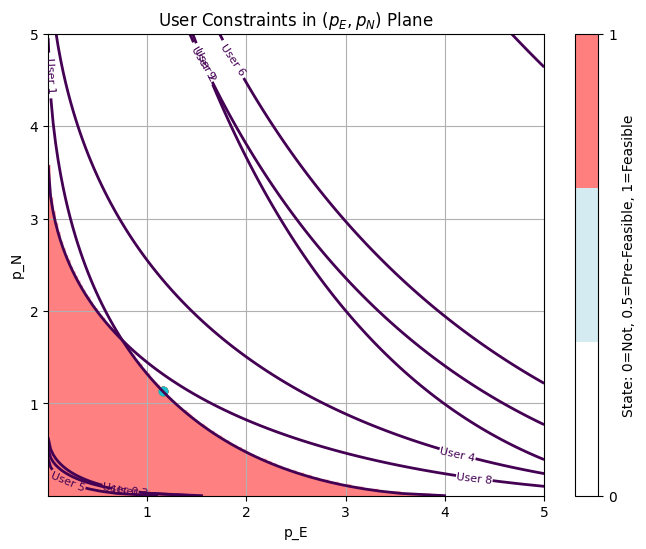

p_E_bnb=1.15718045447, p_N_bnb=1.1303836049
X_bnb={1, 2, 4, 6, 7, 8, 9}
U_bnb=64.64402903070359
{'X': {2}, 'Y': set(), 'U_current': np.float64(0.0), 'UB_val': np.float64(238.29661950157015), 'U_best': np.float64(0.0), 'X_star': {2}, 'p_E': 0.01, 'p_N': 0.01}
{'X': {0, 2}, 'Y': set(), 'U_current': np.float64(7.236327036137353), 'UB_val': np.float64(9.645552742004016), 'U_best': np.float64(0.0), 'X_star': {2}, 'p_E': 1.1088963814700001, 'p_N': 0.0189005149}
{'X': {0, 1, 2}, 'Y': set(), 'U_current': np.float64(11.735533781879306), 'UB_val': np.float64(9.645552742004016), 'U_best': np.float64(0.0), 'X_star': {2}, 'p_E': 1.1088963814700001, 'p_N': 0.0189005149}
{'X': {0, 1, 2, 3}, 'Y': set(), 'U_current': np.float64(14.299856275212182), 'UB_val': np.float64(9.645552742004016), 'U_best': np.float64(0.0), 'X_star': {2}, 'p_E': 1.01956567637, 'p_N': 0.018914293}
{'X': {0, 1, 2, 3, 4}, 'Y': set(), 'U_current': np.float64(18.01961405890598), 'UB_val': np.float64(9.645552742004016), 'U_best': np.

In [19]:
"""
测试 Stackelberg_solver.branch_and_bound

Branch and Bound 算法，用于求解全局的Stackelberg均衡

  参数：
  - users: List[User]，所有用户对象的列表
  - provider: Object<Provider>，provider对象

  返回：
  - X_star: Stackelberg均衡的offloader set
  - U_best: Stackelberg均衡下U_E^*+U_N^*
"""
p_E_bnb, p_N_bnb, X_bnb, U_bnb, results_bnb = Stackelberg_solver.branch_and_bound(users, provider)
f, pf = utils.plot_user_constraints(users, provider, X_bnb, p_E_bnb, p_N_bnb, 5, 5)
print(f"p_E_bnb={p_E_bnb}, p_N_bnb={p_N_bnb}")
print(f"X_bnb={X_bnb}")
print(f"U_bnb={U_bnb}")
for res in results_bnb:
  print(res)
# utils.plot_lattice(users,results_bnb)
of, ob, oc = models.ora_solver([u for u in users if u.user_id in X_bnb], provider, p_E_bnb, p_N_bnb)
print(of, ob, oc)
print(np.sum(of))
print(np.sum(ob))
print(np.sum(of)/provider.f_max)
print(np.sum(ob)/provider.B_max)
for i in [u for u in users if u.user_id in X_bnb]:
  print("user ", i.user_id)
  i.print_bounds(p_E_bnb,p_N_bnb)
  i.print_costs(p_E_bnb,p_N_bnb)

print(np.sum([u.f_hat(p_E_bnb) for u in users if u.user_id in X_bnb]))
print(np.sum([u.B_hat(p_N_bnb) for u in users if u.user_id in X_bnb]))
print(np.sum([u.f_hat(p_E_bnb) for u in users if u.user_id in X_bnb])/provider.f_max)
print(np.sum([u.B_hat(p_N_bnb) for u in users if u.user_id in X_bnb])/provider.B_max)
X_GNE_bnb = user_game_solver.greedy_scm(users, provider, p_E_bnb, p_N_bnb)
print(X_GNE_bnb)

Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional deriva

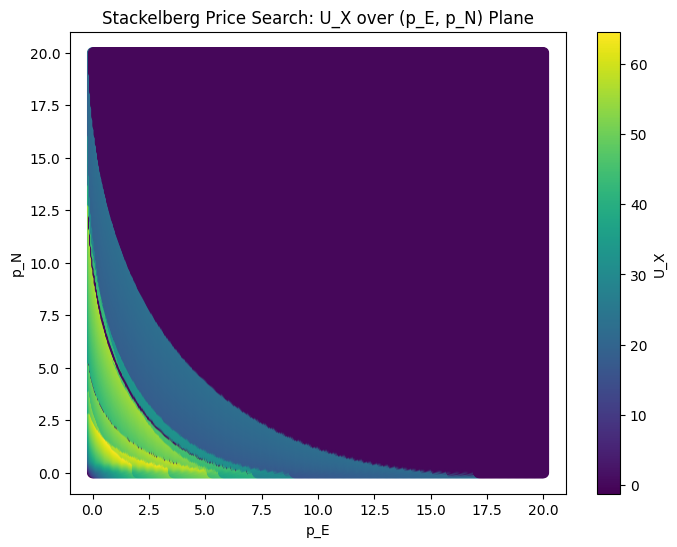

[4.6669475  4.1158826  4.12037741 5.34916047 5.85409311 4.58102777
 5.52693297] [3.15753924 1.98051157 3.46701537 3.27278099 4.01430507 4.83842205
 3.18821113] 130.42239840341867
34.21442182622022
23.91878542530713
0.34214421826220215
0.5979696356326782
user  1
 f_{thres}_ 1 = 4.196275471356491  B_{thres}_ 1 = 2.8642798300827423
 f_{hat}_ 1 = 4.667827300488422  B_{hat}_ 1 = 3.1576252583126414
 C^l_ 1 = 17.511795247515767  C_hat_e_ 1 = 17.466590029587728
 C_{hat}_ef_ 1 = 7.964132291703508  C_{hat}_eb_ 1 = 9.50245773788422
user  2
 f_{thres}_ 2 = 1.0996563442824823  B_{thres}_ 2 = 0.4798199214448364
 f_{hat}_ 2 = 4.117058342144524  B_{hat}_ 2 = 1.9806032002672254
 C^l_ 2 = 20.048013744122855  C_hat_e_ 2 = 12.984788548155745
 C_{hat}_ef_ 2 = 7.024423822635776  C_{hat}_eb_ 2 = 5.960364725519968
user  4
 f_{thres}_ 4 = 1.5336064013575341  B_{thres}_ 4 = 1.5255511240168838
 f_{hat}_ 4 = 4.121211301712291  B_{hat}_ 4 = 3.4688005804845887
 C^l_ 4 = 21.19497470764534  C_hat_e_ 4 = 17.4704084260

In [20]:
pe_or, pn_or, X_or, U_or, results_or = baseline_solver.oracle_baseline_greedy(users, provider, (1e-3,20), (1e-3,20), 400)
print("pe_oracle, pn_oracle=", pe_or, pn_or)
print(f"X_oracle={X_or}, U_oracle={U_or}")
# 提取价格和收益
p_E_vals = np.array([r["p_E"] for r in results_or])
p_N_vals = np.array([r["p_N"] for r in results_or])
U_X_vals = np.array([r["U_X"] for r in results_or])

plt.figure(figsize=(8,6))
sc = plt.scatter(p_E_vals, p_N_vals, c=U_X_vals, cmap="viridis", s=50)
plt.colorbar(sc, label="U_X")
plt.xlabel("p_E")
plt.ylabel("p_N")
plt.title("Stackelberg Price Search: U_X over (p_E, p_N) Plane")
plt.show()
of, ob, oc = models.ora_solver([u for u in users if u.user_id in X_or], provider, pe_or, pn_or)
print(of, ob, oc)
print(np.sum(of))
print(np.sum(ob))
print(np.sum(of)/provider.f_max)
print(np.sum(ob)/provider.B_max)
for i in [u for u in users if u.user_id in X_or]:
  print("user ", i.user_id)
  i.print_bounds(pe_or, pn_or)
  i.print_costs(pe_or, pn_or)

In [21]:
"""
测试 baseline_solver.random_offloader_baseline

    随机选择 offloader 集合，利用增量最佳响应求解价格，
    并计算联合收益。重复多次取收益最高的解作为baseline结果。

    参数:
      users: 用户对象列表，用户对象需包含 user_id、task (含 d, b, alpha)、
             local_cpu，以及 cost_local() 方法。
      provider: Provider 对象，包含 f_max, B_max, c_E, c_N 等参数。
      num_trials: 随机试验次数

    返回:
      best_X: 收益最高的 offloader 集合（集合内存储用户id）
      best_price: 对应的价格 (p_E, p_N)
      best_utility: 最高联合收益
      log_results: 每次试验的记录列表（包含 X, p_E, p_N, utility 等）

"""
X_rand, p_rand, U_rand, results_rand = baseline_solver.random_offloader_baseline(users, provider, 10)
print(f"X_rand={X_rand}")
print(f"p_rand={p_rand}")
print(f"U_rand={U_rand}")

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:498: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])


Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints in

In [10]:
X_best_exhau, U_best_exhau, results = baseline_solver.exhaustive_search(users, provider)
r_best_exhau = next((r for r in results if r["X"] == X_best_exhau), None)
print(f"X_best_exhau={X_best_exhau}")
print(f"U_best_exhau={U_best_exhau}")
print(f"p_E_exhau={r_best_exhau['p_E']}")
print(f"p_N_exhau={r_best_exhau['p_N']}")

Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Op

In [ ]:
"""
测试 baseline_solver.threshold_based_offloader_baseline
选择时延敏感性高于均值的offloader set，然后利用增量最佳响应求解 Stackelberg 均衡。

    参数:
      users,
      provider

    返回:
      X: offloader 集合
      (p_E, p_N): 均衡价格
      utility: 联合收益
      log_info: 包含 X, p_E, p_N, utility 的记录字典
"""
X_thres, (p_E_thres, p_N_thres), U_thres, results_thres = baseline_solver.threshold_based_offloader_baseline(users, provider)
print(f"X_thres={X_thres}")
print(f"p_thres={(p_E_thres, p_N_thres)}")
print(f"U_thres={U_thres}")

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:498: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])


Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for linesearch
Optimization failed: Inequality constraints incompatible
Optimization failed: Positive directional derivative for 

ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solv

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:434: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  fx = wrapped_fun(x)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:438: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  g = append(wrapped_grad(x), 0.0)
/usr/local/lib/python3.11/dist-packages/scipy/optimize/_slsqp_py.py:498: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  a_ieq = vstack([con['jac'](x, *con['args'])


ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solver: offloaders is empty
ora_solv

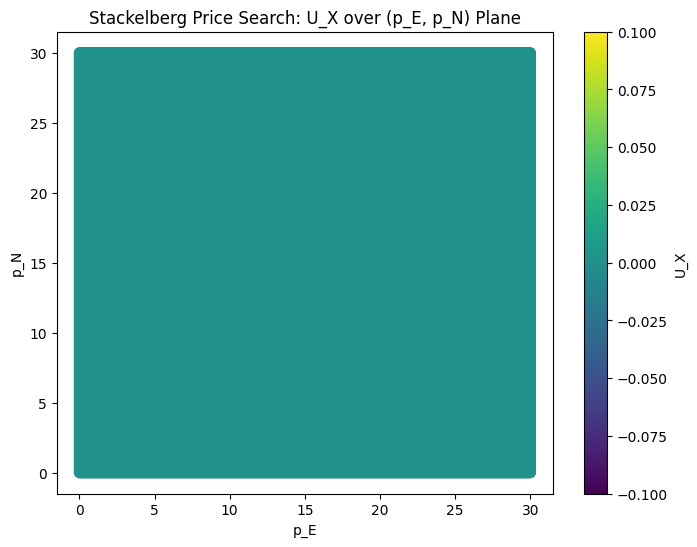

0
0
0.0
0.0


TypeError: argument of type 'NoneType' is not iterable

In [7]:
"""
测试Exhaustive GNE的Oracle
遍历每一个价格点，遍历该点上用户所有可能的卸载决策，找到GNE
然后取出收益最大的Stackelberg均衡

但是效果不好
"""
pe_orex, pn_orex, X_orex, U_orex, results_orex = baseline_solver.oracle_baseline_exhau_gne(users, provider, (1e-3,30), (1e-3,30), 400)
print("pe_oracle_exhau, pn_oracle_exhau=", pe_orex, pn_orex)
print(f"X_oracle_exhau={X_orex}, U_oracle={U_orex}")
# 提取价格和收益
p_E_vals = np.array([r["p_E"] for r in results_orex])
p_N_vals = np.array([r["p_N"] for r in results_orex])
U_X_vals = np.array([r["U_X"] for r in results_orex])

plt.figure(figsize=(8,6))
sc = plt.scatter(p_E_vals, p_N_vals, c=U_X_vals, cmap="viridis", s=50)
plt.colorbar(sc, label="U_X")
plt.xlabel("p_E")
plt.ylabel("p_N")
plt.title("Stackelberg Price Search: U_X over (p_E, p_N) Plane")
plt.show()

best_result_orex = next((r for r in results_orex if r["X"] == X_orex), None)
sum_f_orex, sum_b_orex = best_result_orex["sum_f"], best_result_orex["sum_b"]
print(np.sum(sum_f_orex))
print(np.sum(sum_b_orex))
print(np.sum(sum_f_orex)/provider.f_max)
print(np.sum(sum_b_orex)/provider.B_max)
for i in [u for u in users if u.user_id in X_orex]:
  print("user ", i.user_id)
  i.print_bounds(pe_orex, pn_orex)
  i.print_costs(pe_orex, pn_orex)

In [ ]:
"""
测试 Stackelberg_solver.incremental_best_response

Incremental Best Response 算法，用于求解给定 offloader 集合 X 下的定价均衡。

参数:
  X: offloader 用户的集合（例如：{0, 2, 5}，表示用户ID）
  users: 包含所有用户的列表，每个用户对象需具备属性:
          - user.task.d (计算工作量)
          - user.task.b (数据量)
          - user.task.alpha (延迟敏感度)
  f_max: 系统总计算资源上限
  B_max: 系统总带宽上限
  initial_p_E: ESP 初始价格
  initial_p_N: NSP 初始价格
  c_E: ESP 单位成本（价格下界）
  c_N: NSP 单位成本（价格下界）
  delta: 更新步长
  tolerance: 收敛容差
  max_iter: 最大迭代次数
  eta: 步长收缩因子

返回:
  p_E, p_N: 均衡价格

"""

# 假设 offloader 集合 X 选定一部分用户，比如前 5 个用户
X = {0,1,2}
p_E_eq, p_N_eq = Stackelberg_solver.incremental_best_response(users, provider, X, provider.c_E, provider.c_N)
utils.plot_P_X(users, provider, X, p_E_eq, p_N_eq, p_E_eq+10, p_N_eq+10)
print(p_E_eq, p_N_eq)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""
测试 Stackelberg_solver.node_upper_bound

node_upper_bound 算法，用于求解Branch-and-Bound搜索树中给定节点 (X,Y) 的上界UB(X,Y)。

参数:
  provider: 供应商对象，包含相关信息
  users: 包含所有用户的列表，每个用户对象需具备属性:
          - user.task.d (计算工作量)
          - user.task.b (数据量)
          - user.task.alpha (延迟敏感度)
  X: offloader 用户的集合（例如：{0, 2, 5}，表示用户ID）
返回:
  best_pE, best_pN: arg max_{p_E,p_N\in S^{front}_X} p_E*f^{max}+p_n*B^{max},
  best_val: UB(X,Y)
"""

# 假设 users, provider 已定义，且用户集合X给定，例如X=[0,1,2,3]
X = {0,1,2}
best_pE, best_pN, UB_val = Stackelberg_solver.node_upper_bound(users, provider, X)

# 绘制约束曲线图
utils.plot_user_constraints(users, provider, X, best_pE, best_pN, 50, 50)
print("最优价格点:", best_pE, best_pN)
print("对应UB收益值:", UB_val)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""
测试 Stackelberg_solver.construct_initial_offloader_set

根据论文中“dominance count”的思路，为 Branch-and-Bound 构造初始解 X_init。

参数:
- users : List[User]
    用户列表

返回:
- X_init : set
    初始选出的用户下标或 ID 的集合
"""

X_init = Stackelberg_solver.construct_initial_offloader_set(users,True)
print(X_init)

v:  [[86.11059311652232, np.float64(-8.537857539700221), np.float64(-9.059769630017968)], [81.74493131311937, np.float64(-8.65604883784669), np.float64(-9.102012745206743)], [130.43978076816984, np.float64(-9.770004897673505), np.float64(-9.97508101397798)], [163.78397448373605, np.float64(-9.467849000724396), np.float64(-10.060852074809985)], [76.49453930346665, np.float64(-8.572318447695599), np.float64(-9.020578343735373)], [129.62339625833076, np.float64(-9.021053060517167), np.float64(-8.897036758138723)], [80.89638923406304, np.float64(-7.383685361773625), np.float64(-7.369902890511727)], [92.60319763483282, np.float64(-8.889755991233073), np.float64(-8.889113709998366)], [96.51591745137725, np.float64(-9.3641043422686), np.float64(-9.600980865951563)], [73.4344038648195, np.float64(-8.11482162681764), np.float64(-8.235296259165242)]]
user  0  vs. user  1 :  [86.11059311652232, np.float64(-8.537857539700221), np.float64(-9.059769630017968)] [81.74493131311937, np.float64(-8.65604

In [ ]:
"""
测试 user_game_solver.greedy_scm

贪心算法（Algorithm 1），近似求解 SCM 问题中的用户选择集合。

参数：
- users: 所有用户的可迭代对象，假设 user.user_id 是其标识
- provider: 供应商对象
- p_E, p_N: 给定价格

返回：
- X_star: 最终贪心选出的用户集合（以 user_id 的 set 形式）
"""
import numpy as np
import itertools

p_E, p_N = 1, 1
X = user_game_solver.greedy_scm(users, provider, p_E, p_N)
print(X)

def all_subsets(s):
    """
    返回集合 s 的所有子集（以元组形式）
    """
    s = list(s)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

# 示例：遍历集合 {1, 2, 3} 的所有子集
I = range(len(users))
V_best = np.inf
S_best = []
for subset in all_subsets(I):
    if not subset:
        continue
    print("Subset: ", subset)
    user_subset = [u for u in users if u.user_id in subset]
    fs,bs,cs = models.ora_solver(user_subset, provider, 1, 1)
    f1, b1 = [0 for u in users], [0 for u in users]
    for i in range(len(users)):
      if i not in subset:
        f1[i],b1[i] = 0,0
      else:
        index = next((idx for idx, u in enumerate(user_subset) if u.user_id == i), None)
        f1[i],b1[i] = fs[index],bs[index]
    V = models.social_cost(users, subset, f1, b1, 1, 1)
    print("V: ", V)
    if V < V_best:
        V_best = V
        S_best = subset

for i in [u for u in users if u.user_id in X]:
  print("user ", i.user_id)
  i.print_bounds(1,1)
  i.print_costs(1,1)
of, ob, oc = models.ora_solver([u for u in users if u.user_id in X], provider, p_E, p_N)
V_X = oc+np.sum([u.cost_local() for u in users if u.user_id not in X])
print(of, ob, V_X)
print(np.sum(of)/provider.f_max)
print(np.sum(ob)/provider.B_max)

print("Best subset: ", S_best)
print("Best value: ", V_best)
print("X: ", X)
print("V_X: ", V_X)

`gtol` termination condition is satisfied.
Number of iterations: 17, function evaluations: 91, CG iterations: 15, optimality: 8.69e-07, constraint violation: 0.00e+00, execution time: 0.076 s.
X: {9, 5, 7}
`gtol` termination condition is satisfied.
Number of iterations: 17, function evaluations: 91, CG iterations: 15, optimality: 8.69e-07, constraint violation: 0.00e+00, execution time: 0.07 s.
 V_X= 834.747293206021
candidate user: 8
`gtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 189, CG iterations: 51, optimality: 6.61e-07, constraint violation: 0.00e+00, execution time: 0.13 s.
 V_Xu= 750.1202584361213 , dv= -84.62703476989975
candidate user: 6
`gtol` termination condition is satisfied.
Number of iterations: 24, function evaluations: 171, CG iterations: 40, optimality: 5.22e-07, constraint violation: 0.00e+00, execution time: 0.12 s.
 V_Xu= 754.4831574976217 , dv= -80.2641357083993
candidate user: 0
`gtol` termination condition is satisfie

In [ ]:
"""
测试 baseline_solver.best_response_update

Best Response Update (Backward Induction) Algorithm.

  参数:
      - users: 所有用户列表
      - provider: Provider 对象
      - initial_p_E, initial_p_N: ESP与NSP的初始价格
      - step_p: 每次迭代增加的价格步长
      - max_iter: 最大迭代次数，防止无限循环

  返回:
      - Stackelberg均衡价格 (p_E, p_N)
      - 对应的用户集合X_star
      - 对应的收益(U_E, U_N)
"""
p_E_bru, p_N_bru, X_bru, U_E_bru, U_N_bru, history_bru = baseline_solver.best_response_update(
    users, provider, provider.c_E+0.1, provider.c_N+0.1, step_p=1e-2, max_iter=1000,verbose=True)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tqdm import tqdm

def plot_user_constraints(users, X, p_E=None, p_N=None, p_E_max=100, p_N_max=100, num_points=200):
    plt.figure(figsize=(8,6))

    p_E_range = np.linspace(1e-3, p_E_max, num_points)
    p_N_range = np.linspace(1e-3, p_N_max, num_points)

    for user in [users[i] for i in X]:
        a, d, b, S, C_l = user.task.alpha, user.task.d, user.task.b, user.S_i, user.cost_local()
        A_i = 2*np.sqrt(a*d)
        B_i = 2*np.sqrt(a*b/S)

        P_E, P_N = np.meshgrid(p_E_range, p_N_range)
        constraint = A_i*np.sqrt(P_E) + B_i*np.sqrt(P_N)

        # 绘制轮廓线 (等于C_l的线)
        CS = plt.contour(P_E, P_N, constraint, levels=[C_l], linewidths=2)
        plt.clabel(CS, inline=True, fontsize=8, fmt={C_l: f'User {user.user_id}'})
        if p_E != None and p_N != None: plt.scatter(p_E, p_N)

    pre_feasible_grid = np.zeros((len(p_E_range), len(p_N_range)), dtype=int)
    for i, pe in enumerate(tqdm(p_E_range, desc="Searching p_E")):
      for j, pn in enumerate(tqdm(p_N_range, desc="Searching p_N")):
        print(pe,pn)
        if models.is_price_pre_feasible(users, provider, X, pe, pn):
            pre_feasible_grid[i, j] = 0.5
            if models.is_price_feasible(users, provider, X, pe, pn):
              pre_feasible_grid[i, j] = 1
        else:
          pre_feasible_grid[i, j] = 0

    cmap = ListedColormap(['white', 'lightblue', 'green'])
    plt.imshow(pre_feasible_grid, extent=(p_E_range[0], p_E_range[-1], p_N_range[0], p_N_range[-1]),
              origin='lower', aspect='auto', cmap=cmap, vmin=0, vmax=1, alpha=0.3)
    plt.colorbar(ticks=[0, 0.5, 1], label='State: 0=Not, 0.5=Pre-Feasible, 1=Feasible')

    plt.xlabel('p_E')
    plt.ylabel('p_N')
    plt.title('User Constraints in $(p_E, p_N)$ Plane')
    plt.grid()
    plt.show()

# 绘制约束曲线图
plot_user_constraints(users, [u.user_id for u in users], p_E_bru, p_N_bru, 50, 50, 100)
X_GNE_bru = user_game_solver.greedy_scm(users, provider, p_E_bru, p_N_bru)

print(p_E_bru, p_N_bru)
print(X_bru)
print(U_E_bru, U_N_bru)

print(X_GNE_bru)
for hb in history_bru:
  print(hb)
print(U_E_bru+U_N_bru)